# Initialize

In [ ]:
!pip install torch
!pip install torchvision

!pip install -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 20.6 MB/s eta 0:00:00a 0:00:01


### 기본 설치 (Colab의 경에 해당)
!pip install torchviz

### Local 환경 Path 자동 지정
!conda install python-graphviz

### 참조사이트
- https://free-eunb.tistory.com/14#google_vignette

In [11]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from itertools import islice
from torch.autograd import Variable

# test

In [22]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 20
batch_size = 100
lr = 1e-3

In [16]:
train_data = dsets.MNIST(root = './data', train=True, transform= transforms.ToTensor(), download = True)
test_data = dsets.MNIST(root = './data', train=False, transform= transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset= train_data, batch_size= batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_data, batch_size= batch_size, shuffle=True)

In [18]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [25]:
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
    net.cuda()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [32]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        # images = Variable(images.view(-1, 28 * 28)).cuda()
        lables = Variable(labels)
        # lables = Variable(labels).cuda()
    
        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_function(outputs, lables)
        optimizer.step()

        if (i+1) % 100  == 0:
            print("Epoch [%d/%d], Step [%d/%d], Loss: %.4f"
                %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [100/600], Loss: 2.2945
Epoch [1/20], Step [200/600], Loss: 2.3096
Epoch [1/20], Step [300/600], Loss: 2.3107
Epoch [1/20], Step [400/600], Loss: 2.3080
Epoch [1/20], Step [500/600], Loss: 2.3084
Epoch [1/20], Step [600/600], Loss: 2.3059
Epoch [2/20], Step [100/600], Loss: 2.2935
Epoch [2/20], Step [200/600], Loss: 2.3127
Epoch [2/20], Step [300/600], Loss: 2.2985
Epoch [2/20], Step [400/600], Loss: 2.3057
Epoch [2/20], Step [500/600], Loss: 2.3128
Epoch [2/20], Step [600/600], Loss: 2.3035
Epoch [3/20], Step [100/600], Loss: 2.3057
Epoch [3/20], Step [200/600], Loss: 2.3163
Epoch [3/20], Step [300/600], Loss: 2.3081
Epoch [3/20], Step [400/600], Loss: 2.3046
Epoch [3/20], Step [500/600], Loss: 2.3033
Epoch [3/20], Step [600/600], Loss: 2.3035
Epoch [4/20], Step [100/600], Loss: 2.3069
Epoch [4/20], Step [200/600], Loss: 2.3073
Epoch [4/20], Step [300/600], Loss: 2.3048
Epoch [4/20], Step [400/600], Loss: 2.3053
Epoch [4/20], Step [500/600], Loss: 2.3115
Epoch [4/20

In [33]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    # images = Variable(images.view(-1, 28 * 28)).cuda()
    lables = Variable(labels)
    # lables = Variable(labels).cuda()

    output = net(images)
    _, predicted = torch.max(output, 1)
    correct += (predicted == labels).sum()
    total += labels.size(0)

print("Accuracy of the model: %.3f %%" %((100 * correct) / (total + 1)))

Accuracy of the model: 10.209 %


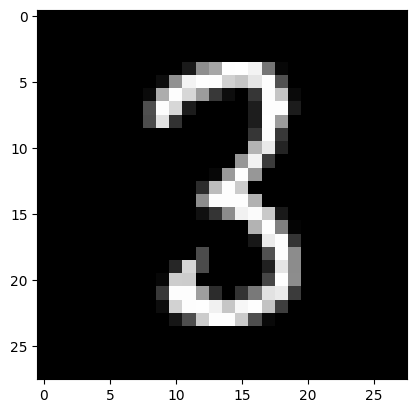

label=tensor(3)
pred=tensor([4])


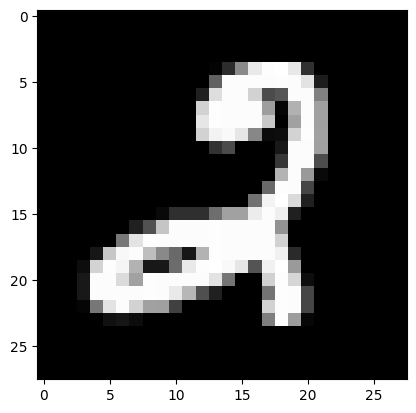

label=tensor(2)
pred=tensor([5])


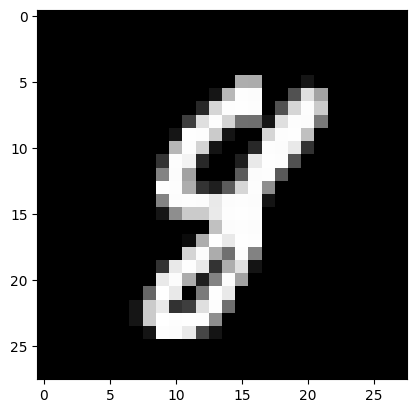

label=tensor(8)
pred=tensor([7])


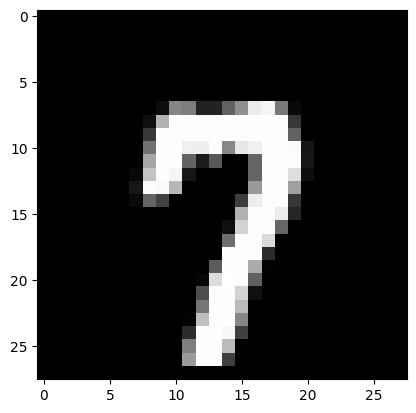

label=tensor(7)
pred=tensor([4])


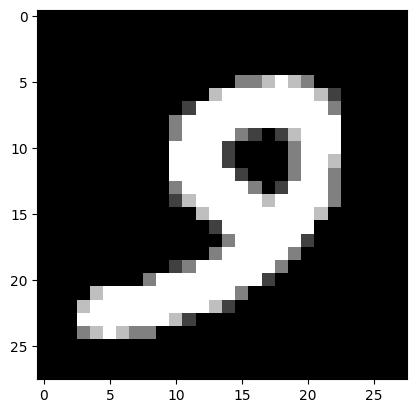

label=tensor(9)
pred=tensor([6])


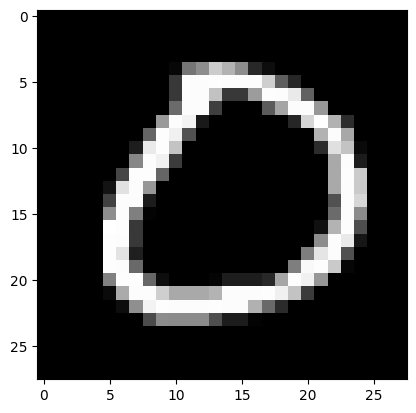

label=tensor(0)
pred=tensor([4])


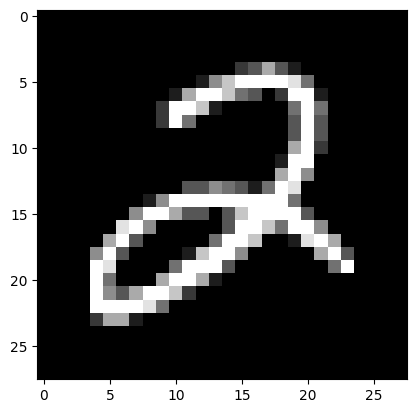

label=tensor(2)
pred=tensor([7])


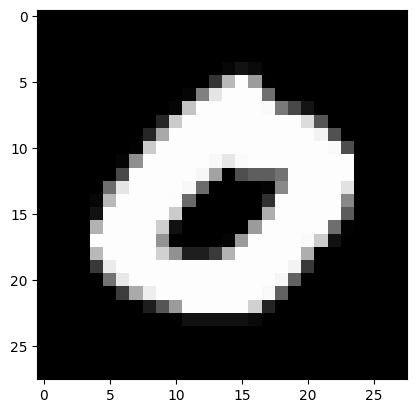

label=tensor(0)
pred=tensor([4])


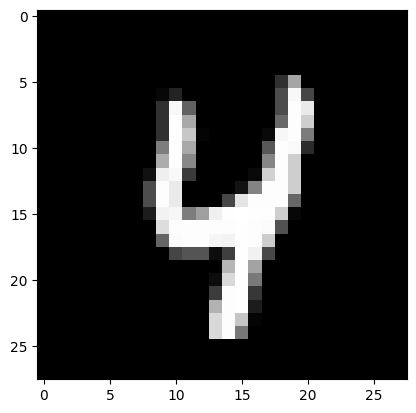

label=tensor(4)
pred=tensor([0])


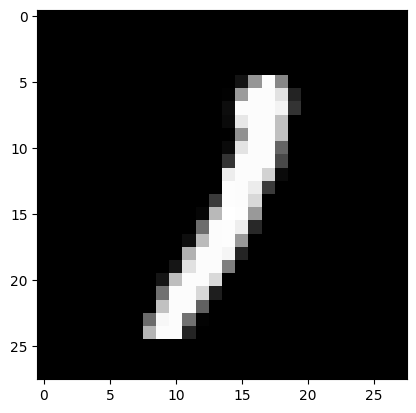

label=tensor(1)
pred=tensor([1])


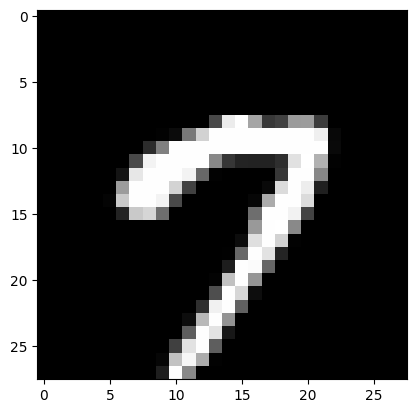

label=tensor(7)
pred=tensor([0])


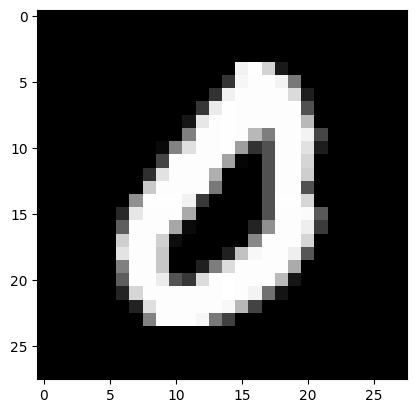

label=tensor(0)
pred=tensor([5])


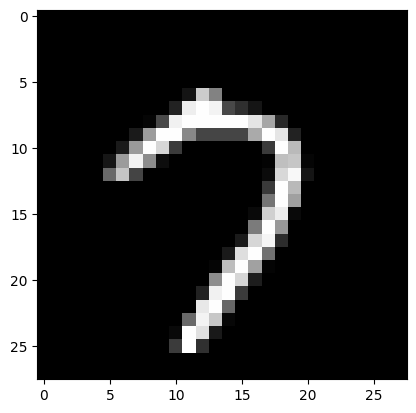

label=tensor(7)
pred=tensor([4])


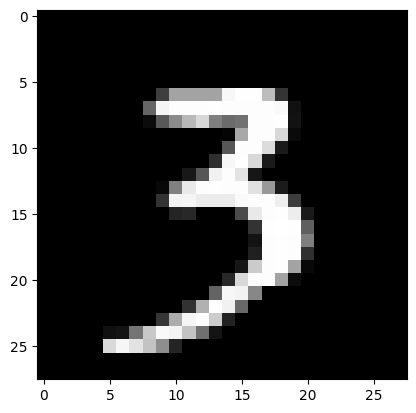

label=tensor(3)
pred=tensor([5])


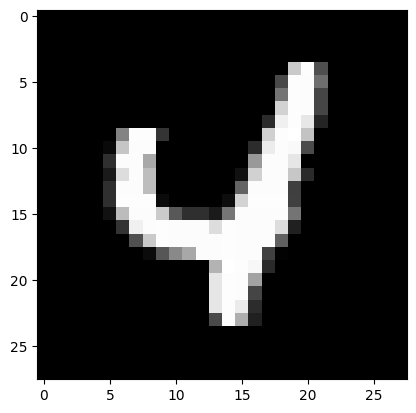

label=tensor(4)
pred=tensor([7])


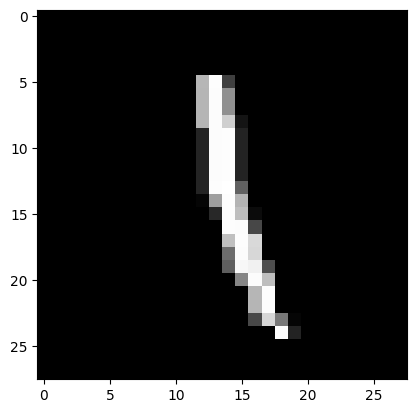

label=tensor(1)
pred=tensor([7])


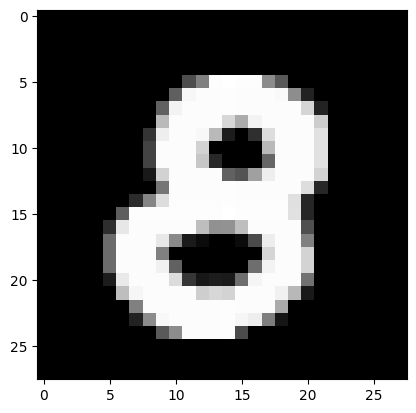

label=tensor(8)
pred=tensor([5])


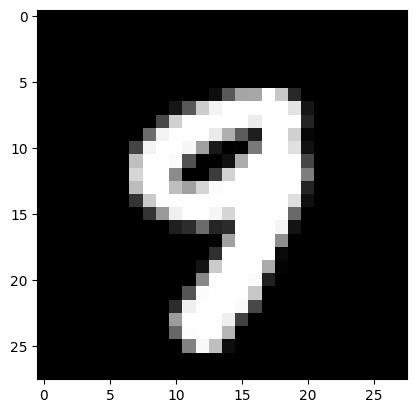

label=tensor(9)
pred=tensor([4])


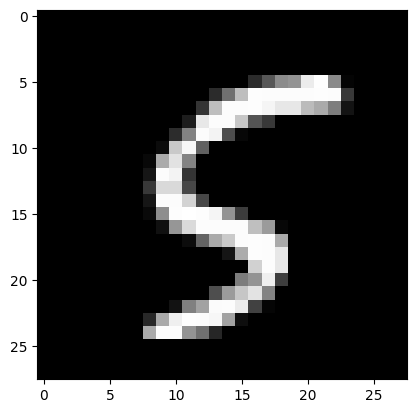

label=tensor(5)
pred=tensor([5])


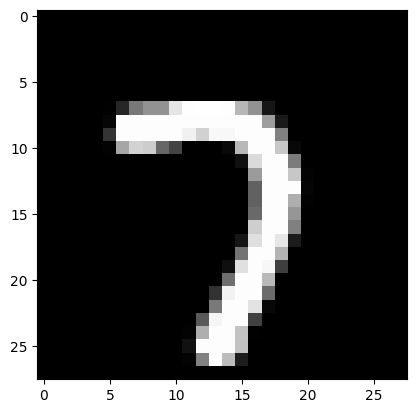

label=tensor(7)
pred=tensor([4])


In [35]:
images, labels = next(iter(test_loader))
for image, label in islice(zip(images, labels), 20):
    _, pred = torch.max(net(Variable(image.view(-1, 28 * 28))), -1)
    # _, pred = torch.max(net(Variable(image.view(-1, 28 * 28).cuda())), -1)
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.show()

    print(f"{label=}")
    print(f"{pred=}")

# test